In [1570]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1571]:
train_df = pd.read_csv('train_titanic.csv')
test_data = pd.read_csv('test_titanic.csv')

training_data = train_df

In [1572]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1573]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1574]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1575]:
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [1576]:
train_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

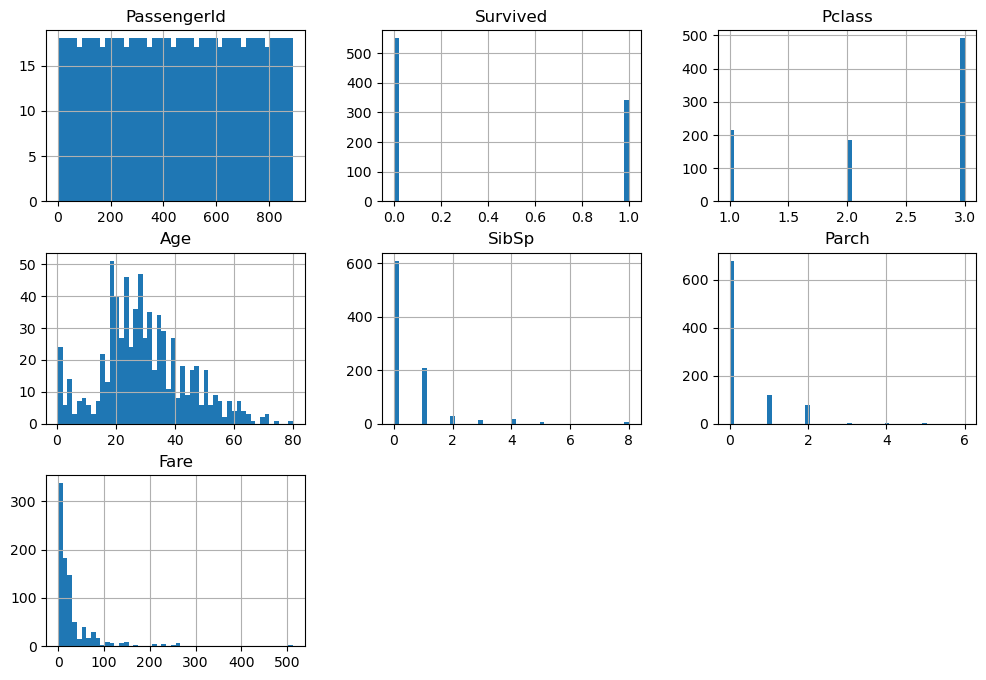

In [1577]:
train_df.hist(bins = 50,figsize=(12,8))
plt.show()

In [1578]:
train_df['age_cat'] = pd.cut(train_df['Age'],bins = [0,10,16,25,40,60,np.inf],labels=['Children','Teenagers','Young Adults','Middle-Aged','Older-Adults','Senior-citizens'])

<Axes: xlabel='age_cat'>

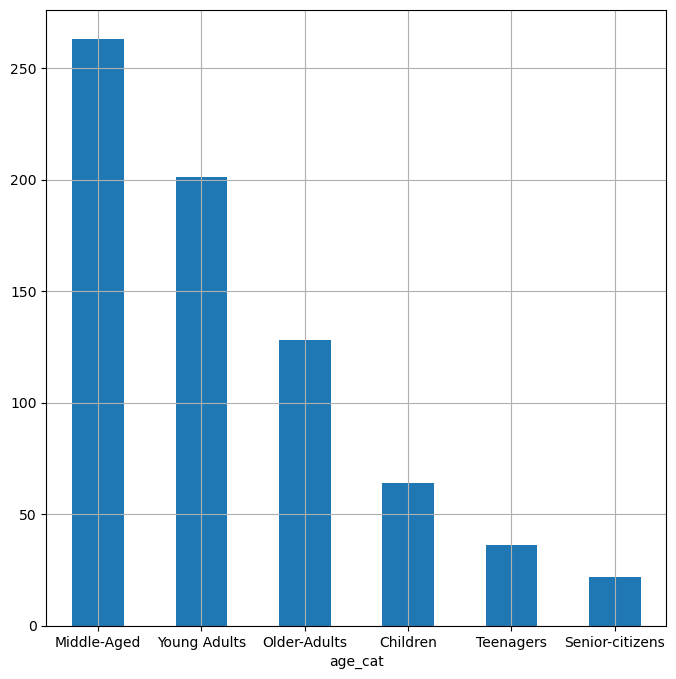

In [1579]:
train_df['age_cat'].value_counts().plot.bar(rot = 0,grid = True,figsize = (8,8))

In [1580]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Middle-Aged
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle-Aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Middle-Aged
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adults
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Middle-Aged


In [1581]:
train_df_numeric = train_df.select_dtypes(np.number)

In [1582]:
corr = train_df_numeric.corr()
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

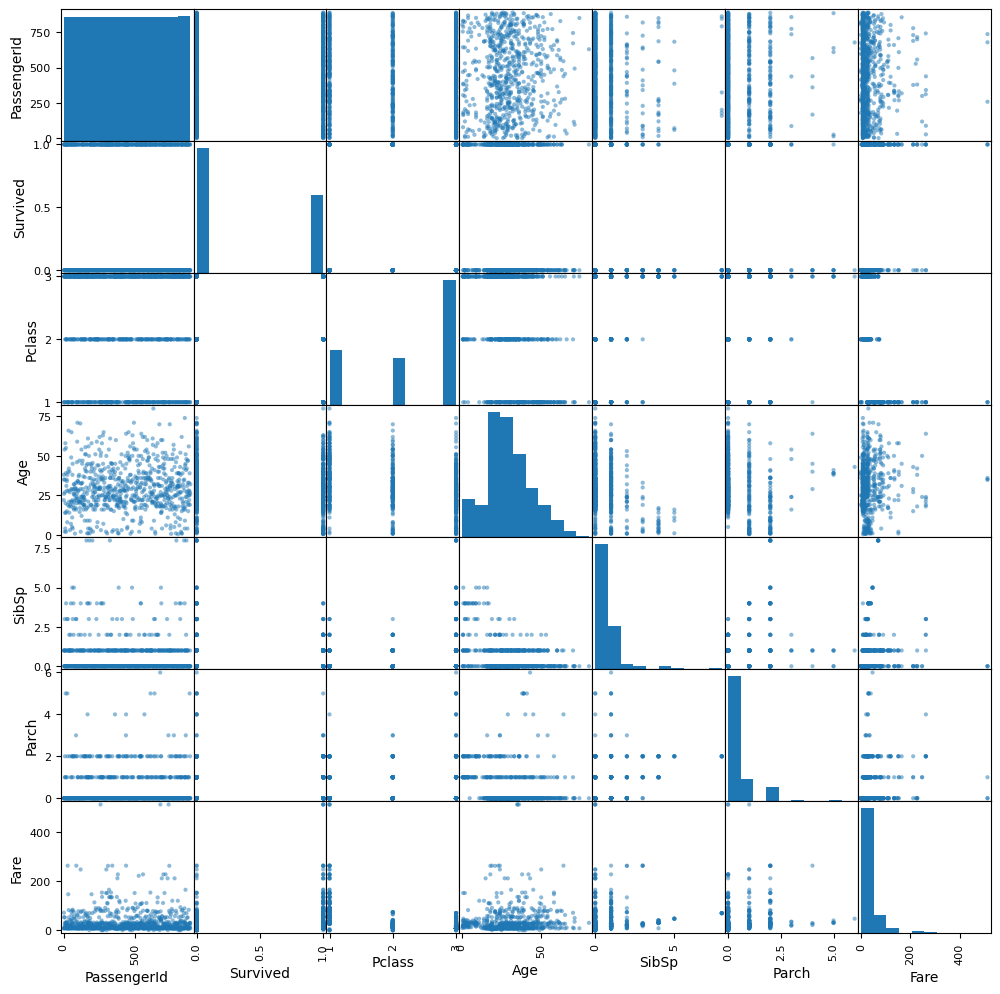

In [1583]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_df_numeric,figsize=(12,12))
plt.show()

In [1584]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Middle-Aged
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle-Aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Middle-Aged
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adults
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Middle-Aged


In [1585]:
train_df = train_df.drop(['Name','Ticket'],axis = 1)
train_df = train_df.drop('PassengerId',axis = 1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_cat
0,0,3,male,22.0,1,0,7.2500,NaN,S,Young Adults
1,1,1,female,38.0,1,0,71.2833,C85,C,Middle-Aged
2,1,3,female,26.0,0,0,7.9250,NaN,S,Middle-Aged
3,1,1,female,35.0,1,0,53.1000,C123,S,Middle-Aged
4,0,3,male,35.0,0,0,8.0500,NaN,S,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Middle-Aged
887,1,1,female,19.0,0,0,30.0000,B42,S,Young Adults
888,0,3,female,NaN,1,2,23.4500,NaN,S,NaN
889,1,1,male,26.0,0,0,30.0000,C148,C,Middle-Aged


In [1586]:
train_df['Had_Sibling/Spouse?'] = train_df['SibSp'] > 0
train_df['Had_Parent/children?'] = train_df['Parch'] > 0
train_df['Had_anyone_close_onboard?'] = train_df['Had_Sibling/Spouse?'].astype(bool) | train_df['Had_Parent/children?'].astype(bool)

<Axes: ylabel='Frequency'>

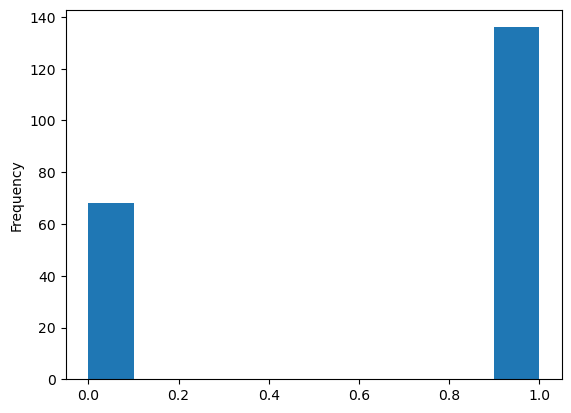

In [1587]:
train_df[train_df['Cabin'].notna()]['Survived'].plot.hist()

<Axes: ylabel='Frequency'>

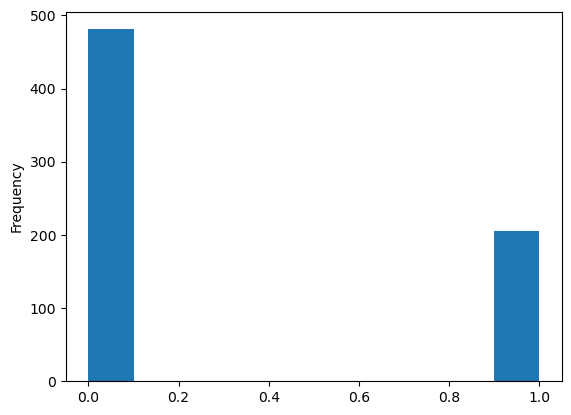

In [1588]:
train_df[train_df['Cabin'].isna()]['Survived'].plot.hist()

In [1589]:
train_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [1590]:
train_df['has_cabin'] = train_df['Cabin'].notna().astype(bool)
train_df = train_df.drop('Cabin',axis = 1)

In [1591]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_cat,Had_Sibling/Spouse?,Had_Parent/children?,Had_anyone_close_onboard?,has_cabin
0,0,3,male,22.0,1,0,7.2500,S,Young Adults,True,False,True,False
1,1,1,female,38.0,1,0,71.2833,C,Middle-Aged,True,False,True,True
2,1,3,female,26.0,0,0,7.9250,S,Middle-Aged,False,False,False,False
3,1,1,female,35.0,1,0,53.1000,S,Middle-Aged,True,False,True,True
4,0,3,male,35.0,0,0,8.0500,S,Middle-Aged,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Middle-Aged,False,False,False,False
887,1,1,female,19.0,0,0,30.0000,S,Young Adults,False,False,False,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,True,True,True,False
889,1,1,male,26.0,0,0,30.0000,C,Middle-Aged,False,False,False,True


In [1592]:
train_df['SibSp'].value_counts().sort_index()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

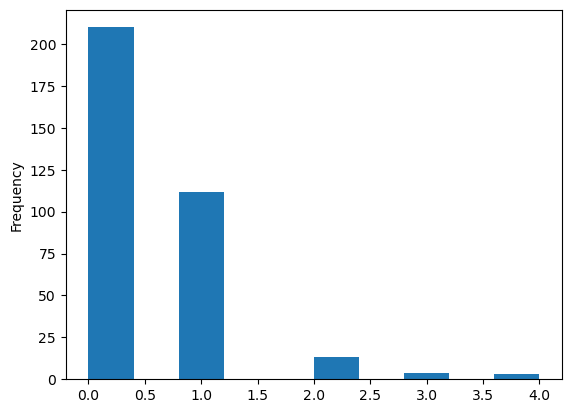

In [1593]:
train_df[train_df['Survived'] == 1]['SibSp'].plot.hist()

In [1594]:
# # Get value counts sorted by index
# sibsp_counts = train_df['SibSp'].value_counts().sort_index()
# sibsp_survived_percent = train_df[train_df['Survived'] == 1]['SibSp'].value_counts().values / train_df
# # Plot
# plt.bar(sibsp_counts.index, sibsp_counts.values)
# plt.xlabel("Number of Siblings/Spouses Aboard (SibSp)")
# plt.ylabel("Count")
# plt.title("Distribution of SibSp in Titanic Dataset")
# plt.xticks(sibsp_counts.index)  # Ensure correct x-tick labels
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [1595]:
train_df[train_df['Survived'] == 1]['SibSp'].value_counts().values

array([210, 112,  13,   4,   3], dtype=int64)

In [1596]:
train_df[train_df['Survived'] == 1]['SibSp'].value_counts()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64

In [1597]:
sibsp_counts.values

array([608, 209,  28,  16,  18,   5,   7], dtype=int64)

In [1598]:
train_df[train_df['Survived'] == 1]['SibSp'].value_counts()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64

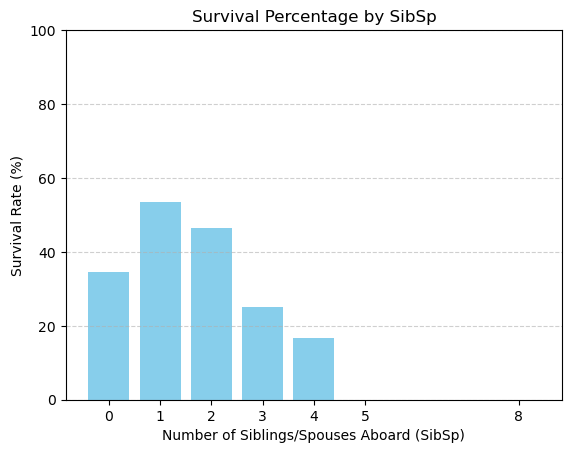

In [1599]:
# Group by SibSp and calculate mean survival rate (percentage of survivors)
survival_rate = train_df.groupby('SibSp')['Survived'].mean() * 100

# Plot
plt.bar(survival_rate.index, survival_rate.values, color='skyblue')
plt.xlabel("Number of Siblings/Spouses Aboard (SibSp)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Percentage by SibSp")
plt.xticks(survival_rate.index)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

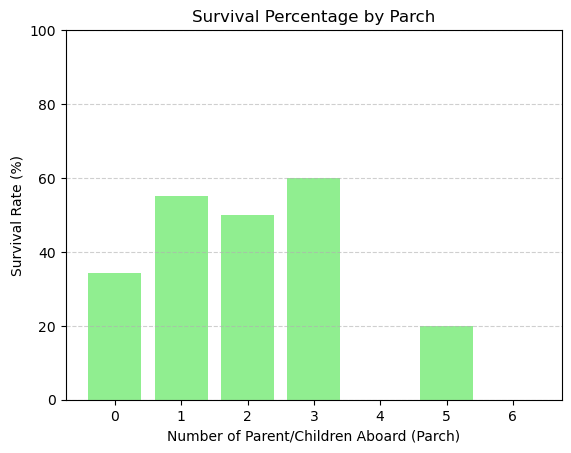

In [1600]:
survival_rate_parent_child = train_df.groupby('Parch')['Survived'].mean() * 100

plt.bar(survival_rate_parent_child.index, survival_rate_parent_child.values, color='lightgreen')
plt.xlabel("Number of Parent/Children Aboard (Parch)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Percentage by Parch")
plt.xticks(survival_rate_parent_child.index)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [1601]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_cat,Had_Sibling/Spouse?,Had_Parent/children?,Had_anyone_close_onboard?,has_cabin
0,0,3,male,22.0,1,0,7.2500,S,Young Adults,True,False,True,False
1,1,1,female,38.0,1,0,71.2833,C,Middle-Aged,True,False,True,True
2,1,3,female,26.0,0,0,7.9250,S,Middle-Aged,False,False,False,False
3,1,1,female,35.0,1,0,53.1000,S,Middle-Aged,True,False,True,True
4,0,3,male,35.0,0,0,8.0500,S,Middle-Aged,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Middle-Aged,False,False,False,False
887,1,1,female,19.0,0,0,30.0000,S,Young Adults,False,False,False,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,True,True,True,False
889,1,1,male,26.0,0,0,30.0000,C,Middle-Aged,False,False,False,True


In [1602]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Survived                   891 non-null    int64   
 1   Pclass                     891 non-null    int64   
 2   Sex                        891 non-null    object  
 3   Age                        714 non-null    float64 
 4   SibSp                      891 non-null    int64   
 5   Parch                      891 non-null    int64   
 6   Fare                       891 non-null    float64 
 7   Embarked                   889 non-null    object  
 8   age_cat                    714 non-null    category
 9   Had_Sibling/Spouse?        891 non-null    bool    
 10  Had_Parent/children?       891 non-null    bool    
 11  Had_anyone_close_onboard?  891 non-null    bool    
 12  has_cabin                  891 non-null    bool    
dtypes: bool(4), category(1), float64(2)

In [1603]:
# This transformer also didn't Come of much use
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted

class Age_classification(BaseEstimator,TransformerMixin):
    def __init__(self,bins = [0,10,16,25,40,60,np.inf],labels = ['Children','Teenagers','Young Adults','Middle-Aged','Older-Adults','Senior-citizens']):
        self.bins = bins
        self.labels = labels
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1] # No. Of columns
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        assert self.feature_names_in_ == list(X.columns)
        if not isinstance(X,pd.DataFrame):
             X = pd.DataFrame(X, columns=self.feature_names_in_)
        else:
            X = X.copy() # To preserve the original X
        
        X['age_cat'] = pd.cut(X['Age'],bins = self.bins,labels = self.labels)
        return X[['age_cat']].to_numpy()


In [1604]:
# Tranformer didn't Come of much use

class Drop_Useless_columns(BaseEstimator,TransformerMixin):
    def __init__(self,columns = ['Name','Ticket','PassengerId']):
        self.columns = columns
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        assert self.feature_names_in_ == list(X.columns)
        if not isinstance(X,pd.DataFrame):
             X = pd.DataFrame(X, columns=self.feature_names_in_)
        else:
            X = X.copy() # To preserve the original X

        X = X.drop(self.columns,axis = 1)
        return X.to_numpy()
        

In [1605]:

class Label_extractor(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        return X
    def get_feature_names_out(self, input_features=None):
        return ['Survived']

In [1606]:
class Add_new_columns(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        assert self.feature_names_in_ == list(X.columns)
        if not isinstance(X,pd.DataFrame):
             X = pd.DataFrame(X, columns=self.feature_names_in_)
        else:
            X = X.copy() # To preserve the original X

        X['Had_Sibling/Spouse?'] = X['SibSp'] > 0
        X['Had_Parent/children?'] = X['Parch'] > 0
        X['Had_anyone_close_onboard?'] = X['Had_Sibling/Spouse?'].astype(bool) | X['Had_Parent/children?'].astype(bool)
        X['has_cabin'] = X['Cabin'].notna().astype(bool)
        # X = X.drop('Cabin',axis = 1) # Bad Practise but Doing it
        
        return X[['Had_Sibling/Spouse?', 'Had_Parent/children?', 'Had_anyone_close_onboard?', 'has_cabin']].to_numpy()
    def get_feature_names_out(self, input_features=None):
        return [
            'Had_Sibling/Spouse?',
            'Had_Parent/children?',
            'Had_anyone_close_onboard?',
            'has_cabin'
        ]



In [1607]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder

num_pipeline_scale = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

num_pipeline_skew_scale = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('fix_skew', PowerTransformer()),  # Handles skewness
    ('scale', StandardScaler())
])

default_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))

feature_engineer_pipeline = make_pipeline(Add_new_columns())

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [1608]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Label_extraction = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)),
    ('label_extract', Label_extractor())
])

preprocessing_train_data = ColumnTransformer([
    ('passenger_class', default_pipeline, ['Pclass', 'SibSp', 'Parch']),
    ('encode_cat', cat_pipeline, ['Sex', 'Embarked']),
    ('skew_scale', num_pipeline_skew_scale, ['Age', 'Fare']),
    ('feature_engineer', feature_engineer_pipeline, ['SibSp', 'Parch', 'Cabin']),
    ('label_pipeline', Label_extraction, ['Survived'])
], remainder='drop')

preprocessing_test_data = ColumnTransformer([
    ('passenger_class', default_pipeline, ['Pclass', 'SibSp', 'Parch']),
    ('encode_cat', cat_pipeline, ['Sex', 'Embarked']),
    ('skew_scale', num_pipeline_skew_scale, ['Age', 'Fare']),
    ('feature_engineer', feature_engineer_pipeline, ['SibSp', 'Parch', 'Cabin']),
], remainder='drop')

In [1609]:
processed_X_train = preprocessing_train_data.fit_transform(training_data)
processed_X_test = preprocessing_test_data.fit_transform(test_data)

In [1610]:
processed_X_train.shape

(891, 15)

In [1611]:
processed_X_test

array([[3., 0., 0., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 1., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [3., 1., 1., ..., 1., 1., 0.]])

In [1612]:
preprocessing_train_data.get_feature_names_out()

array(['passenger_class__Pclass', 'passenger_class__SibSp',
       'passenger_class__Parch', 'encode_cat__Sex_female',
       'encode_cat__Sex_male', 'encode_cat__Embarked_C',
       'encode_cat__Embarked_Q', 'encode_cat__Embarked_S',
       'skew_scale__Age', 'skew_scale__Fare',
       'feature_engineer__Had_Sibling/Spouse?',
       'feature_engineer__Had_Parent/children?',
       'feature_engineer__Had_anyone_close_onboard?',
       'feature_engineer__has_cabin', 'label_pipeline__Survived'],
      dtype=object)

In [1613]:
preprocessing_test_data.get_feature_names_out()

array(['passenger_class__Pclass', 'passenger_class__SibSp',
       'passenger_class__Parch', 'encode_cat__Sex_female',
       'encode_cat__Sex_male', 'encode_cat__Embarked_C',
       'encode_cat__Embarked_Q', 'encode_cat__Embarked_S',
       'skew_scale__Age', 'skew_scale__Fare',
       'feature_engineer__Had_Sibling/Spouse?',
       'feature_engineer__Had_Parent/children?',
       'feature_engineer__Had_anyone_close_onboard?',
       'feature_engineer__has_cabin'], dtype=object)

In [1614]:
X_train = processed_X_train[:, :-1] # Training Data
Y_train = processed_X_train[:, -1:].ravel() # Labels for Training Data ravel() for getting shape in 1-d to prevent warnings

X_test = processed_X_test # Test Data
Y_test = processed_X_test # Labels for Test data

In [1615]:
X_train_df = pd.DataFrame(X_train,columns = preprocessing_train_data.get_feature_names_out()[:-1])
X_train_df

,passenger_class__Pclass,passenger_class__SibSp,passenger_class__Parch,encode_cat__Sex_female,encode_cat__Sex_male,encode_cat__Embarked_C,encode_cat__Embarked_Q,encode_cat__Embarked_S,skew_scale__Age,skew_scale__Fare,feature_engineer__Had_Sibling/Spouse?,feature_engineer__Had_Parent/children?,feature_engineer__Had_anyone_close_onboard?,feature_engineer__has_cabin
0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.523388,-0.878820,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.685109,1.336651,1.0,0.0,1.0,1.0
2,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.208093,-0.790065,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.468033,1.067352,1.0,0.0,1.0,1.0
4,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.468033,-0.774439,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.130855,-0.294907,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.767474,0.527906,0.0,0.0,0.0,1.0
888,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,-0.054196,0.288885,1.0,1.0,1.0,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.208093,0.527906,0.0,0.0,0.0,1.0


In [1616]:
X_test_df = pd.DataFrame(X_test,columns = preprocessing_test_data.get_feature_names_out())
X_test_df

,passenger_class__Pclass,passenger_class__SibSp,passenger_class__Parch,encode_cat__Sex_female,encode_cat__Sex_male,encode_cat__Embarked_C,encode_cat__Embarked_Q,encode_cat__Embarked_S,skew_scale__Age,skew_scale__Fare,feature_engineer__Had_Sibling/Spouse?,feature_engineer__Had_Parent/children?,feature_engineer__Had_anyone_close_onboard?,feature_engineer__has_cabin
0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.432975,-0.903049,0.0,0.0,0.0,0.0
1,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.330008,-1.042542,1.0,0.0,1.0,0.0
2,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.327412,-0.643707,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.145793,-0.778850,0.0,0.0,0.0,0.0
4,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.554798,-0.364663,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.145793,-0.868718,0.0,0.0,0.0,0.0
414,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.764354,1.611158,0.0,0.0,0.0,1.0
415,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.728046,-0.998599,0.0,0.0,0.0,0.0
416,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.145793,-0.868718,0.0,0.0,0.0,0.0


In [1617]:
Y_train_df = pd.DataFrame(Y_train,columns=['Survived'])
Y_train_df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [1618]:
from sklearn.linear_model import SGDClassifier,LogisticRegression,PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier()
log_clf = LogisticRegression()
forest_clf = RandomForestClassifier()
tree_clf = DecisionTreeClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
gbc_clf = GradientBoostingClassifier()
pagg_clf = PassiveAggressiveClassifier()

classifiers_store = []
k_fold_validation = 3 # No. Of times to validate
scoring_metric = 'f1'

for classifier in [sgd_clf,log_clf,forest_clf,tree_clf,svc_clf,knn_clf,gbc_clf,pagg_clf]:
    indi_classifier = [] # Empty List for Storing classifiers results
    classifier.fit(X_train,Y_train)
    cross_val_score_classifier = cross_val_score(classifier,X_train,Y_train,cv = k_fold_validation,scoring = scoring_metric)
    cross_val_score_classifier_mean = cross_val_score_classifier.mean()
    indi_classifier.append(classifier.__class__.__name__)
    indi_classifier.extend(cross_val_score_classifier)
    indi_classifier.append(cross_val_score_classifier_mean) # Mean of k fold Cross Validation 
    classifiers_store.append(indi_classifier) # appends to the end of list of all classifiers

classifiers_store = np.array(classifiers_store)
Model_perfomance_df = pd.DataFrame(classifiers_store,columns = ['Model_name'] + [f'{k} th fold_result' for k in range(1,k_fold_validation + 1)] + [f'{scoring_metric}-Score']).round(4)
for col in Model_perfomance_df.columns[1:]:
    Model_perfomance_df[col] = pd.to_numeric(Model_perfomance_df[col], errors='coerce') # For converting dtype to float 64

Model_perfomance_df = Model_perfomance_df.round(4)
Model_perfomance_df.sort_values(by = f'{scoring_metric}-Score',ascending=False)

,Model_name,1 th fold_result,2 th fold_result,3 th fold_result,f1-Score
4,SVC,0.7397,0.7838,0.7536,0.7590
6,GradientBoostingClassifier,0.7081,0.7580,0.7393,0.7352
1,LogisticRegression,0.7328,0.7489,0.7122,0.7313
2,RandomForestClassifier,0.6875,0.7686,0.7182,0.7247
5,KNeighborsClassifier,0.6912,0.7500,0.7150,0.7187
3,DecisionTreeClassifier,0.6516,0.7186,0.6930,0.6877
0,SGDClassifier,0.7143,0.6462,0.4768,0.6124
7,PassiveAggressiveClassifier,0.4624,0.7360,0.5939,0.5975


C:\Users\jitik\AppData\Local\Temp\ipykernel_43484\2298967350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


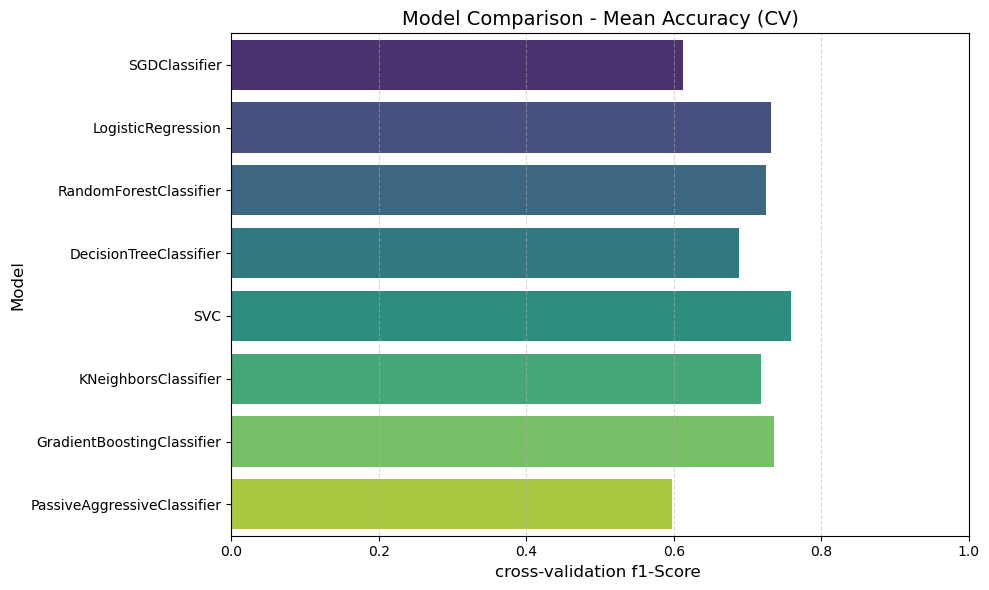

In [1619]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    y='Model_name',
    x=f'{scoring_metric}-Score',
    data=Model_perfomance_df,
    palette='viridis'
)

plt.xlabel(f'cross-validation {scoring_metric}-Score ', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Comparison - Mean Accuracy (CV)', fontsize=14)
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [1620]:
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(log_clf,X_train,Y_train,cv = 3)
Y_train_pred


array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [1621]:
Y_train_forest_pred = cross_val_predict(forest_clf,X_train,Y_train,cv = 3)
Y_train_forest_pred

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [1622]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

confusion_matrix(Y_train,Y_train_pred)

array([[465,  84],
       [ 96, 246]], dtype=int64)

In [1623]:
precision_score(Y_train,Y_train_pred)


0.7454545454545455

In [1624]:
recall_score(Y_train,Y_train_pred)

0.7192982456140351

In [1625]:
some_data = X_train[10]
some_data

array([ 3.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        , -2.15948988, -0.04548834,
        1.        ,  1.        ,  1.        ,  1.        ])

In [1626]:

log_clf.decision_function([some_data])

array([2.35067512])

In [1627]:
log_clf.predict([some_data])

array([1.])

In [1628]:
Y_train_decision_scores = cross_val_predict(log_clf,X_train,Y_train,cv = 3,method = 'decision_function')
Y_train_decision_scores

array([-2.09075206e+00,  3.20521731e+00,  2.65845616e-01,  2.79503545e+00,
       -2.64398175e+00, -2.39164107e+00, -5.73738956e-01, -2.59483984e+00,
        2.38896912e-01,  2.46113761e+00,  2.14472777e+00,  1.72495324e+00,
       -2.16229423e+00, -4.75668503e+00,  6.73865137e-01,  3.88074576e-01,
       -3.35599933e+00, -1.51942258e+00,  5.70716948e-01,  5.75286066e-01,
       -1.49685276e+00, -1.20009871e+00,  6.62052082e-01,  7.13321041e-02,
       -2.31705843e-01, -2.09264069e+00, -2.05765551e+00, -1.18333698e+00,
        2.16384960e-01, -2.43266620e+00, -4.81331085e-01,  3.73602496e+00,
        2.10582631e-01, -2.69239858e+00,  4.19084204e-01, -5.60880554e-01,
       -2.05745205e+00, -2.19626842e+00,  1.09168212e-01,  1.38205122e+00,
        7.18756987e-02,  1.48869184e+00, -2.02652894e+00,  2.45025064e+00,
        5.14282509e-01, -2.42587508e+00, -2.00284535e+00,  2.10582631e-01,
       -2.38577314e+00,  9.94102274e-01, -3.49737312e+00, -2.20734407e+00,
        2.90769517e+00,  

In [1629]:
from sklearn.metrics import precision_recall_curve

precision,recall,threshold = precision_recall_curve(Y_train,Y_train_decision_scores)

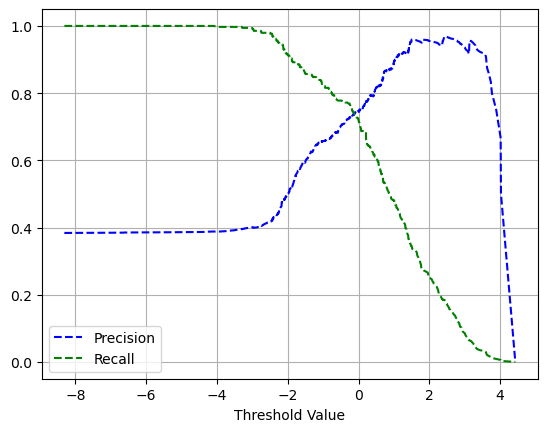

In [1630]:
plt.plot(threshold,precision[:-1],'b--',label = 'Precision')
plt.plot(threshold,recall[:-1],'g--',label = 'Recall')
plt.xlabel('Threshold Value')
plt.grid()
plt.legend()
plt.show()


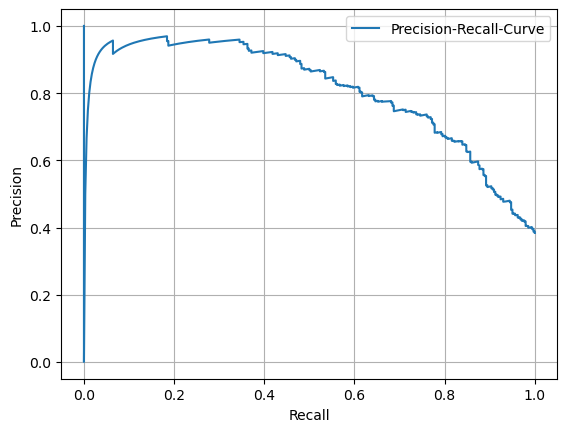

In [1631]:
plt.plot(recall,precision,label = 'Precision-Recall-Curve')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [1632]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(Y_train,Y_train_decision_scores)

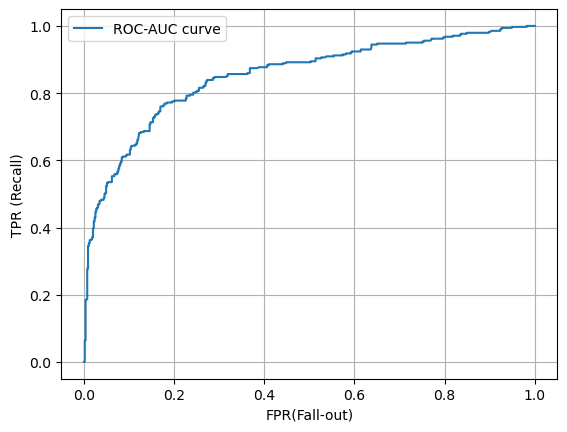

In [1633]:
plt.plot(fpr,tpr,label = 'ROC-AUC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR (Recall)')
plt.grid()
plt.legend()
plt.show()

In [1634]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train,Y_train_decision_scores)

0.8523391812865497

In [1635]:
log_clf.coef_

array([[-0.69568958, -0.74078048, -0.40233646,  1.30185958, -1.30516183,
         0.0619055 ,  0.14842043, -0.21362817, -0.51939451,  0.2658919 ,
         0.71795781,  0.59065496, -0.00806904,  0.58008996]])

In [1636]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10,20,100,1000],
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1',n_jobs=-1)
grid.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 100, 1000]},
             scoring='f1')

In [1637]:
print("Best Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Params: {'C': 10}
Best F1 Score: 0.7397163199913729


In [1638]:
pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score', ascending=False)[[
    'params', 'mean_test_score', 'std_test_score'
]].round(4)


,params,mean_test_score,std_test_score
4,{'C': 10},0.7397,0.0275
5,{'C': 20},0.7386,0.0266
6,{'C': 100},0.7386,0.0266
7,{'C': 1000},0.7386,0.0266
3,{'C': 1},0.7382,0.0294
2,{'C': 0.1},0.7342,0.0314
1,{'C': 0.01},0.6266,0.0716
0,{'C': 0.001},0.0285,0.0178


In [1639]:
final_log_reg_model = grid.best_estimator_ # Final-Tuned Logistic Regression Model
final_log_reg_model.fit(X_train,Y_train)

LogisticRegression(C=10)

In [1640]:
Y_test_pred = final_log_reg_model.predict(X_test)

In [1641]:
Y_test_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [1642]:
# Due to Absernce Of Ground truth labels due to downloading data from kaggle , ill be crafting a csv to upload to the website

results_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].values,
    'Survived': Y_test_pred
},dtype = np.int64)

In [1643]:
results_df['Survived'].value_counts()

Survived
0    256
1    162
Name: count, dtype: int64

In [1644]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [1645]:
results_df.to_csv('kaggle_titanic_submission.csv',index = False)
# Final Submission Got an Score of 76 %